# 第十六讲：投影矩阵和最小二乘

上一讲中，我们知道了投影矩阵$P=A(A^TA)^{-1}A^T$，$Pb$将会把向量投影在$A$的列空间中。

举两个极端的例子： 
* 如果$b\in C(A)$，则$Pb=b$；
* 如果$b\bot C(A)$，则$Pb=0$。

一般情况下，$b$将会有一个垂直于$A$的分量，有一个在$A$列空间中的分量，投影的作用就是去掉垂直分量而保留列空间中的分量。

在第一个极端情况中，如果$b\in C(A)$则有$b=Ax$。带入投影矩阵$p=Pb=A(A^TA)^{-1}A^TAx=Ax$，得证。

在第二个极端情况中，如果$b\bot C(A)$则有$b\in N(A^T)$，即$A^Tb=0$。则$p=Pb=A(A^TA)^{-1}A^Tb=0$，得证。

向量$b$投影后，有$b=e+p, p=Pb, e=(I-P)b$，这里的$p$是$b$在$C(A)$中的分量，而$e$是$b$在$N(A^T)$中的分量。

回到上一讲最后提到的例题：

我们需要找到距离图中三个点 $(1, 1), (2, 2), (3, 2)$ 偏差最小的直线：$y=C+Dt$。

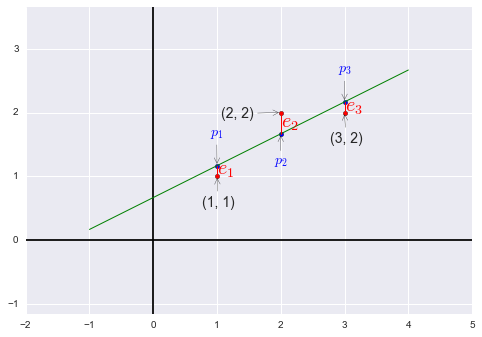

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sns

x = np.array([1, 2, 3]).reshape((-1,1))
y = np.array([1, 2, 2]).reshape((-1,1))
predict_line = np.array([-1, 4]).reshape((-1,1))

regr = linear_model.LinearRegression()
regr.fit(x, y)
ey = regr.predict(x)

fig = plt.figure()
plt.axis('equal')
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')

plt.scatter(x, y, c='r')
plt.scatter(x, regr.predict(x), s=20, c='b')
plt.plot(predict_line, regr.predict(predict_line), c='g', lw='1')
[ plt.plot([x[i], x[i]], [y[i], ey[i]], 'r', lw='1') for i in range(len(x))]

plt.annotate('(1, 1)', xy=(1, 1), xytext=(-15, -30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(2, 2)', xy=(2, 2), xytext=(-60, -5), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('(3, 2)', xy=(3, 2), xytext=(-15, -30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))

plt.annotate('$e_1$', color='r', xy=(1, 1), xytext=(0, 2), textcoords='offset points', size=20)
plt.annotate('$e_2$', color='r', xy=(2, 2), xytext=(0, -15), textcoords='offset points', size=20)
plt.annotate('$e_3$', color='r', xy=(3, 2), xytext=(0, 1), textcoords='offset points', size=20)

plt.annotate('$p_1$', xy=(1, 7/6), color='b', xytext=(-7, 30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('$p_2$', xy=(2, 5/3), color='b', xytext=(-7, -30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.annotate('$p_3$', xy=(3, 13/6), color='b', xytext=(-7, 30), textcoords='offset points', size=14, arrowprops=dict(arrowstyle="->"))
plt.draw()

In [2]:
plt.close(fig)

根据条件可以得到方程组 
$
\begin{cases}
C+D&=1 \\
C+2D&=2 \\
C+3D&=2 \\
\end{cases}
$，写作矩阵形式
$\begin{bmatrix}1&1 \\1&2 \\1&3\\\end{bmatrix}\begin{bmatrix}C\\D\\\end{bmatrix}=\begin{bmatrix}1\\2\\2\\\end{bmatrix}$，也就是我们的$Ax=b$，很明显方程组无解。

我们需要在$b$的三个分量上都增加某个误差$e$，使得三点能够共线，同时使得$e_1^2+e_2^2+e_3^2$最小，找到拥有最小平方和的解（即最小二乘），即$\left\|Ax-b\right\|^2=\left\|e\right\|^2$最小。此时向量$b$变为向量$p=\begin{bmatrix}p_1\\p_2\\p_3\end{bmatrix}\\$（在方程组有解的情况下，$Ax-b=0$，即$b$在$A$的列空间中，误差$e$为零。）我们现在做的运算也称作线性回归（linear regression），使用误差的平方和作为测量总误差的标准。

注：如果有另一个点，如$(0, 100)$，在本例中该点明显距离别的点很远，最小二乘将很容易被离群的点影响，通常使用最小二乘时会去掉明显离群的点。

现在我们尝试解出$\hat x=\begin{bmatrix}\hat C\\ \hat D\end{bmatrix}$与$p=\begin{bmatrix}p_1\\p_2\\p_3\end{bmatrix}$。

$$
A^TA\hat x=A^Tb\\
A^TA=
\begin{bmatrix}3&6\\6&14\end{bmatrix}\qquad
A^Tb=
\begin{bmatrix}5\\11\end{bmatrix}\\
\begin{bmatrix}3&6\\6&14\end{bmatrix}
\begin{bmatrix}\hat C\\\hat D\end{bmatrix}=
\begin{bmatrix}5\\11\end{bmatrix}\\
$$

写作方程形式为$\begin{cases}3\hat C+16\hat D&=5\\6\hat C+14\hat D&=11\\\end{cases}$，也称作正规方程组（normal equations）。

回顾前面提到的“使得误差最小”的条件，$e_1^2+e_2^2+e_3^2=(C+D-1)^2+(C+2D-2)^2+(C+3D-2)^2$，使该式取最小值，如果使用微积分方法，则需要对该式的两个变量$C, D$分别求偏导数，再令求得的偏导式为零即可，正是我们刚才求得的正规方程组。（正规方程组中的第一个方程是对$C$求偏导的结果，第二个方程式对$D$求偏导的结果，无论使用哪一种方法都会得到这个方程组。）

解方程得$\hat C=\frac{2}{3}, \hat D=\frac{1}{2}$，则“最佳直线”为$y=\frac{2}{3}+\frac{1}{2}t$，带回原方程组解得$p_1=\frac{7}{6}, p_2=\frac{5}{3}, p_3=\frac{13}{6}$，即$e_1=-\frac{1}{6}, e_2=\frac{1}{3}, e_3=-\frac{1}{6}$

于是我们得到$p=\begin{bmatrix}\frac{7}{6}\\\frac{5}{3}\\\frac{13}{6}\end{bmatrix}, e=\begin{bmatrix}-\frac{1}{6}\\\frac{1}{3}\\-\frac{1}{6}\end{bmatrix}$，易看出$b=p+e$，同时我们发现$p\cdot e=0$即$p\bot e$。

误差向量$e$不仅垂直于投影向量$p$，它同时垂直于列空间，如 $\begin{bmatrix}1\\1\\1\end{bmatrix}, \begin{bmatrix}1\\2\\3\end{bmatrix}$。

接下来我们观察$A^TA$，如果$A$的各列线性无关，求证$A^TA$是可逆矩阵。

先假设$A^TAx=0$，两边同时乘以$x^T$有$x^TA^TAx=0$，即$(Ax)^T(Ax)=0$。一个矩阵乘其转置结果为零，则这个矩阵也必须为零（$(Ax)^T(Ax)$相当于$Ax$长度的平方）。则$Ax=0$，结合题设中的“$A$的各列线性无关”，可知$x=0$，也就是$A^TA$的零空间中有且只有零向量，得证。

我们再来看一种线性无关的特殊情况：互相垂直的单位向量一定是线性无关的。

* 比如$\begin{bmatrix}1\\0\\0\end{bmatrix}\begin{bmatrix}0\\1\\0\end{bmatrix}\begin{bmatrix}0\\0\\1\end{bmatrix}$，这三个正交单位向量也称作标准正交向量组（orthonormal vectors）。
* 另一个例子$\begin{bmatrix}\cos\theta\\\sin\theta\end{bmatrix}\begin{bmatrix}-\sin\theta\\\cos\theta\end{bmatrix}$

下一讲研究标准正交向量组。